Importing Required Libraries

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Data Preparation

In [2]:
# Set dataset directory path
dataset_dir = "C:\\Users\\rajee\\SCT_ML_4\\1\\leapGestRecog"  # Path to your dataset

# Create ImageDataGenerator for data augmentation and rescaling
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # Normalize pixel values

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_dir,
    subset='training',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    subset='validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 32000 images belonging to 11 classes.
Found 8000 images belonging to 11 classes.


Defining the Model Architecture

In [3]:
# Define the model
model = Sequential([
    Input(shape=(64, 64, 3)),  # Input layer with specified input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer for multiple classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [4]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)

c:\Users\rajee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 284s 280ms/step - accuracy: 0.5715 - loss: 1.0123 - val_accuracy: 0.1000 - val_loss: 4.4682
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 247s 247ms/step - accuracy: 0.5915 - loss: 0.6135 - val_accuracy: 0.1000 - val_loss: 5.4156
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 368s 368ms/step - accuracy: 0.5880 - loss: 0.5938 - val_accuracy: 0.1000 - val_loss: 5.4627
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 559s 559ms/step - accuracy: 0.5919 - loss: 0.5841 - val_accuracy: 0.1000 - val_loss: 5.8085
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 897s 898ms/step - accuracy: 0.5947 - loss: 0.5767 - val_accuracy: 0.1000 - val_loss: 7.0925
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1432s 1s/step - accuracy: 0.5962 - loss: 0.5733 - val_accuracy: 0.1000 - val_loss: 6.8876
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 224s 224ms/step - accuracy: 0.5949 - loss: 0.5739 - val_accuracy: 0.1000 - val_loss: 7.9349
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 216s 216ms/step - accu

Model Evaluation

In [5]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.1007 - loss: 8.9991
Validation Loss: 9.023703575134277
Validation Accuracy: 0.10000000149011612


Saving the Model

In [6]:
# Save the trained model for later use
model.save('gesture_recognition_model.h5')
print("Model saved as gesture_recognition_model.h5")

Model saved as gesture_recognition_model.h5


Making Predictions on New Images

In [7]:
# Load and preprocess a test image
img_path = "C:\\Users\\rajee\\SCT_ML_4\\1\\leapGestRecog\\00\\01_palm\\frame_00_01_0001.png"  # Path to your test image
img = cv2.imread(img_path)  # Load the image
if img is None:
    print(f"Error: Unable to load image at {img_path}. Check the path.")
else:
    # Preprocess the image
    img = cv2.resize(img, (64, 64))  # Resize to 64x64
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image

    # Predict the class of the image
    prediction = model.predict(img)  # Make prediction
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability

    # Reverse the class indices to get class names
    class_labels = {v: k for k, v in train_data.class_indices.items()}  # Reverse class indices
    predicted_class_name = class_labels[predicted_class]  # Get class name from label

    # Display the result
    print(f"Predicted class index: {predicted_class}")
    print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Predicted class index: 0
Predicted class name: 00


Plotting Training History

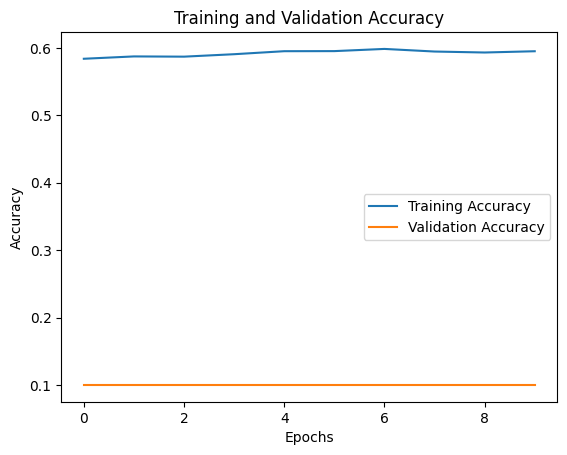

In [8]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
